In [1]:
import numpy as np
import pandas as pd
import nltk

In [2]:
dataset=pd.read_csv('../datasets/hatespeech.csv')
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [71]:
dataset['class'].value_counts()

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

In [3]:
df=dataset[['tweet','class']]
df=pd.DataFrame(df)
df

,tweet,class
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1
24779,"you've gone and broke the wrong heart baby, an...",2
24780,young buck wanna eat!!.. dat nigguh like I ain...,1
24781,youu got wild bitches tellin you lies,1


In [4]:
df.isnull().sum()

tweet    0
class    0
dtype: int64

In [5]:
from symspellpy.symspellpy import SymSpell, Verbosity

from symspellpy.symspellpy import SymSpell, Verbosity

# Initialize SymSpell object
sym_spell = SymSpell(max_dictionary_edit_distance=2)

# Load the frequency dictionary
dictionary_path = r"C:\Users\91781\OneDrive\Desktop\MLProjects\datasets\fdsymspelly.txt"
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

def correct_text(text):
    corrected_words = []
    for word in text.split():
        # Skip emoji tokens
        if word.startswith("EMOJI_"):
            corrected_words.append(word)
        else:
            suggestions = sym_spell.lookup_compound(word, max_edit_distance=2)
            if suggestions:
                corrected_words.append(suggestions[0].term)
            else:
                corrected_words.append(word)
    return " ".join(corrected_words)



In [7]:
import re
import emoji
import html
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def clean_text_data(text):
    # Lowercase
    text = text.lower()

    # Convert HTML entities
    text = html.unescape(text)

    # Replace emojis with EMOJI_<name> tokens
    text = emoji.demojize(text)  # ":face_with_tears_of_joy:" etc.
    text = re.sub(r":([a-zA-Z0-9_]+):", r" EMOJI_\1 ", text)  # Preserve as single token

    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # Remove emails and URLs
    text = re.sub(r"(https?://\S+|www\.\S+|\S+@\S+\.\S+)", " ", text)

    # Remove mentions and RT
    text = re.sub(r"(@\w+|rt)", " ", text)

    # Remove hashtags (optional)
    text = re.sub(r"#", "", text)

    # Correct spellings
    text = correct_text(text)

    # Remove punctuation except underscore (EMOJI tokens use underscore)
    text = re.sub(r"[^a-zA-Z0-9_\s]", " ", text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [w for w in words if w not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]

    # Rejoin
    return " ".join(words)



In [8]:
df['tweet'] = df['tweet'].apply(clean_text_data)


In [9]:
df['tweet'][27]

'met pussy ocean gave pussy pill EMOJI_relieved_face'

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(filters='!"#$%&()*+,./:;<=>?@[\\]^`{|}~\t\n')  # '_' is NOT removed
tokenizer.fit_on_texts(df['tweet'])
tokenizer.word_index

{'bitch': 1,
 'hoe': 2,
 'emoji_face_with_tears_of_joy': 3,
 'like': 4,
 'nigga': 5,
 'pussy': 6,
 'as': 7,
 'fuck': 8,
 'get': 9,
 'got': 10,
 'shit': 11,
 'int': 12,
 'low': 13,
 'trash': 14,
 'fucking': 15,
 'know': 16,
 'one': 17,
 'love': 18,
 'go': 19,
 'girl': 20,
 'want': 21,
 'emoji_loudly_crying_face': 22,
 'bird': 23,
 'make': 24,
 'bad': 25,
 'good': 26,
 'look': 27,
 'day': 28,
 'say': 29,
 'lao': 30,
 'man': 31,
 'see': 32,
 'need': 33,
 'faggot': 34,
 'time': 35,
 'think': 36,
 'back': 37,
 'hate': 38,
 'still': 39,
 'never': 40,
 'let': 41,
 'real': 42,
 'done': 43,
 'people': 44,
 'really': 45,
 'right': 46,
 'new': 47,
 'white': 48,
 'even': 49,
 'face': 50,
 'would': 51,
 'said': 52,
 'life': 53,
 'big': 54,
 'come': 55,
 'call': 56,
 'emoji_weary_face': 57,
 'dick': 58,
 'talk': 59,
 'cut': 60,
 'bout': 61,
 'wit': 62,
 'wanna': 63,
 'stop': 64,
 'tell': 65,
 'take': 66,
 'nigger': 67,
 'damn': 68,
 'little': 69,
 'talking': 70,
 'gotta': 71,
 'every': 72,
 'emoji_h

In [11]:
sequences = tokenizer.texts_to_sequences(df['tweet'])
sequences

[[96, 963, 2772, 197, 31, 87, 66, 14],
 [82, 315, 452, 1439, 25, 2184, 84, 2, 434, 380],
 [522, 97, 8, 1, 111, 238, 907, 11],
 [27, 4, 513],
 [11, 429, 235, 381, 235, 4608, 1, 185],
 [11, 701, 708, 1168, 385, 39, 15, 2, 3, 3, 3],
 [419, 38, 155, 1, 10, 115, 11, 91],
 [80, 443, 54, 1, 327, 78, 608, 20],
 [235, 9, 1, 37],
 [2336, 3409, 1128, 2524, 1],
 [269, 1, 1664, 301, 13, 1169, 1518, 4, 130],
 [3410, 709, 1, 709, 1372],
 [2, 396, 1307, 316, 19],
 [25, 1, 101, 4],
 [1, 9],
 [1, 5, 318],
 [1, 1665, 624],
 [1, 18],
 [1, 9, 60, 625],
 [116, 1029, 25, 1],
 [187, 1, 275, 65, 135],
 [2337, 1, 4, 2338],
 [275, 32, 2, 964, 374],
 [8, 1, 43, 49, 188, 58, 3, 3, 3, 4609, 369, 61, 8],
 [10, 1, 884, 4610, 7566, 1051, 3],
 [6, 626, 4, 1775, 481, 535],
 [2, 767],
 [645, 6, 2043, 411, 6, 1251, 535],
 [33, 3940, 1, 8, 3411],
 [1091, 83, 21, 1, 592],
 [218, 119, 1, 47, 1, 6, 3941],
 [29, 37, 119, 119, 1, 51, 9, 1252, 535],
 [12, 61, 1373, 92, 6, 5, 147],
 [1030, 12, 43, 6, 1666],
 [43, 998, 1, 1892, 96

In [12]:
max_len=max([len(sent) for sent in sequences])
max_len

81

In [13]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
input_sequences=np.array(pad_sequences(sequences,maxlen=max_len,padding='pre'))
input_sequences

array([[    0,     0,     0, ...,    87,    66,    14],
       [    0,     0,     0, ...,     2,   434,   380],
       [    0,     0,     0, ...,   238,   907,    11],
       ...,
       [    0,     0,     0, ...,    12,    15,   256],
       [    0,     0,     0, ...,     1,   479,   352],
       [    0,     0,     0, ...,    98,    48, 12903]])

In [14]:
X=input_sequences
y=dataset['class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,Embedding,Bidirectional,LSTM,GRU,Dropout,BatchNormalization,SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras import regularizers


vocab_size = len(tokenizer.word_index) + 1 

model=Sequential()
model.add(Input((max_len,)))
model.add(Embedding(input_dim=vocab_size,output_dim=20))
model.add(SpatialDropout1D(0.4))
model.add(Bidirectional(LSTM(16,dropout=0.5, recurrent_dropout=0.4,
    kernel_regularizer=regularizers.l2(0.01),recurrent_regularizer=regularizers.l2(0.01))))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))


In [61]:

model.compile(optimizer="adam",loss="SparseCategoricalCrossentropy",metrics=["accuracy",])
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)        │ (None, 81, 20)         │       258,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_9             │ (None, 81, 20)         │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_13                │ (None, 32)             │         4,736 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 263,043 (1.00 MB)

 Trainable params: 262,979 (1.00 MB)

 Non-trainable params: 64 (256.00 B)

In [62]:
early_stopping=EarlyStopping(monitor='loss',patience=2,restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.00001)


In [63]:
history=model.fit(
    X_train,y_train,validation_data=(X_test,y_test),epochs=30,
    callbacks=[early_stopping,lr_scheduler]
)


Epoch 1/30
620/620 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.6438 - loss: 1.1970 - val_accuracy: 0.8140 - val_loss: 0.4789 - learning_rate: 0.0010
Epoch 2/30
620/620 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.8632 - loss: 0.4344 - val_accuracy: 0.8828 - val_loss: 0.3580 - learning_rate: 0.0010
Epoch 3/30
620/620 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.8912 - loss: 0.3576 - val_accuracy: 0.8820 - val_loss: 0.3493 - learning_rate: 0.0010
Epoch 4/30
620/620 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.8961 - loss: 0.3275 - val_accuracy: 0.8656 - val_loss: 0.3643 - learning_rate: 0.0010
Epoch 5/30
620/620 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - accuracy: 0.8965 - loss: 0.3130 - val_accuracy: 0.8856 - val_loss: 0.3447 - learning_rate: 0.0010
Epoch 6/30
620/620 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.9030 - loss: 0.2941 - val_accuracy: 0.8814 - val_loss: 0.3401 - learning_rate: 0.0010
Epoch 7/30
620/620 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.9066 - l

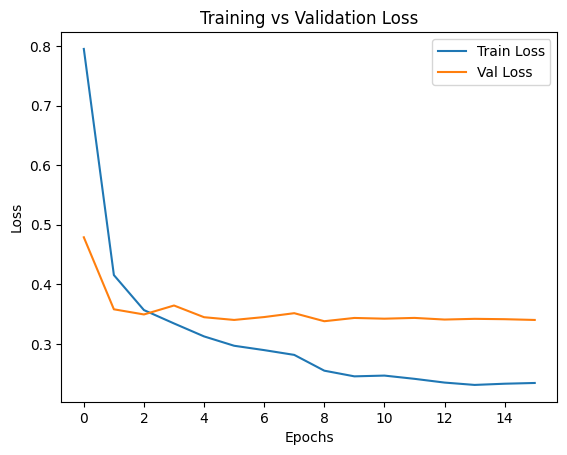

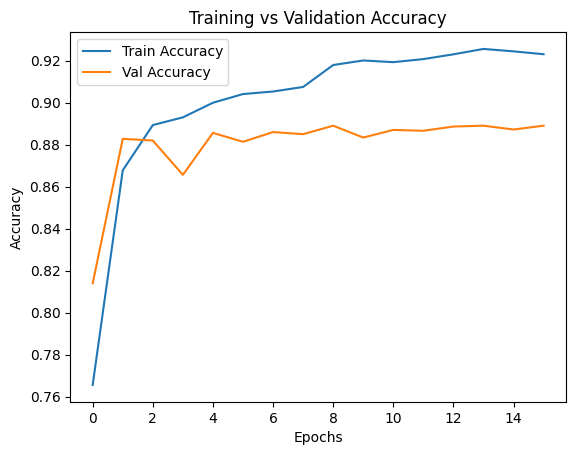

In [64]:
import matplotlib.pyplot as plt

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()


In [ ]:
model.save('model.keras')

NameError: name 'model' is not defined

In [67]:
import pickle
with open("tokenizer.pickle",'wb') as file:
    pickle.dump(tokenizer,file,protocol=pickle.HIGHEST_PROTOCOL)

In [70]:
import json
data_to_save = {
    'max_len': max_len,
    'class_labels': {0: 'hate', 1: 'offensive', 2: 'neither'}
}
with open('config.json', 'w') as f:
    json.dump(data_to_save, f)
